In [1]:
# データ処理ライブラリ
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# 画像処理ライブラリ
import cv2

# 可視化ライブラリ
import matplotlib.pyplot as plt

# Keras
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# Pythonモジュール
import os
import glob

# 表示設定
pd.options.display.max_rows = 78
pd.options.display.max_columns = 78

Using TensorFlow backend.


In [2]:
#Hiraganakey.csv読込
import pandas as pd
labels=pd.read_csv("HiraganaKey.csv")
labels.head(100)

,文字,ディレクトリ,画像数
0,あ,U3042,"1,208"
1,い,U3044,"1,122"
2,う,U3046,"1,148"
3,え,U3048,"1,077"
4,お,U304A,"1,283"
5,か,U304B,"1,259"
6,が,U304C,"1,200"
7,き,U304D,"1,121"
8,ぎ,U304E,"1,091"
9,く,U304F,"1,266"


In [3]:
#画像データのパスを指定
path="./hiragana73/"

In [4]:
#hiragana73内のエントリを取得
import os
dir_list=[]
for test in os.listdir(path):
    dir_list.append(test)
    
#最初の５つを表示
dir_list[0:100]

['charfeatures.npy',
 'files_df.csv',
 'U3042',
 'U3044',
 'U3046',
 'U3048',
 'U304A',
 'U304B',
 'U304C',
 'U304D',
 'U304E',
 'U304F',
 'U3050',
 'U3051',
 'U3052',
 'U3053',
 'U3054',
 'U3055',
 'U3056',
 'U3057',
 'U3058',
 'U3059',
 'U305A',
 'U305B',
 'U305C',
 'U305D',
 'U305E',
 'U305F',
 'U3060',
 'U3061',
 'U3062',
 'U3064',
 'U3065',
 'U3066',
 'U3067',
 'U3068',
 'U3069',
 'U306A',
 'U306B',
 'U306C',
 'U306D',
 'U306E',
 'U306F',
 'U3070',
 'U3071',
 'U3072',
 'U3073',
 'U3074',
 'U3075',
 'U3076',
 'U3077',
 'U3078',
 'U3079',
 'U307A',
 'U307B',
 'U307C',
 'U307D',
 'U307E',
 'U307F',
 'U3080',
 'U3081',
 'U3082',
 'U3084',
 'U3086',
 'U3088',
 'U3089',
 'U308A',
 'U308B',
 'U308C',
 'U308D',
 'U308F',
 'U3090',
 'U3091',
 'U3092',
 'U3093']

In [5]:
# U3081（平仮名 め）の画像ファイル名を取得
me_imgs_path = path + dir_list[0]
me_file_name = sorted(glob.glob(me_imgs_path + '/' + '*.png'))
print(len(me_file_name))
me_file_name[0:5]

0


[]

In [6]:
# ファイル取得用の空のリストを作成
files=[]
moji=[]

# 各画像データのファイル名を取得
for foldername in os.listdir(path):
    imgs_path=path+foldername
    imgs=sorted(glob.glob(imgs_path+'/'+'*.png'))
    
    for name in imgs:
        files.append(str(name))
        moji.append(str(labels['文字'][labels['ディレクトリ']==foldername].values[0]))

files_df=pd.DataFrame({'Image':files,'Label':moji},index=None)

files_df=pd.DataFrame({'Image':files,'Label':moji},index=None)

In [7]:
files_df.shape

(80000, 2)

Label- あ
Image Shape- (48, 48)


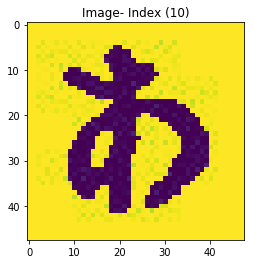

In [8]:
# 10番目のレコードの画像ファイルを読み込み
testchar = cv2.imread(files_df['Image'][10],0)

# 読み込んだ画像データを表示
plt.imshow(testchar)
print('Label-',files_df['Label'][10])
print('Image Shape-',testchar.shape)
plt.title('Image- Index (10)')
plt.show()

In [9]:
files_df=files_df.sample(frac=1,random_state=42).reset_index(drop=True)

In [10]:
datalist=[]

for i in range(80000):
    character=cv2.imread(files_df['Image'][i],0)
    character=character.reshape(2304)
    datalist.append(character)

In [11]:
#リストからNumpy配列への変換
charfeatures=np.array(datalist)

In [12]:
charfeatures.shape

(80000, 2304)

In [13]:
#Numpy配列をnpyファイルとして書き出し
np.save(path+'charfeatures.npy',charfeatures)

In [14]:
#files_dfをcsvファイルとして書き出し
files_df.to_csv(path+'files_df.csv',index=False)

In [15]:
#charfeatures.npyを読込
charfeatures_load=np.load(path+'charfeatures.npy')
#サイズを確認
print(charfeatures_load.shape)

(80000, 2304)


In [16]:
#files_df.csv読込
files_df_load=pd.read_csv(path+'files_df.csv')

#最初の5行
files_df.head()

,Image,Label
0,./hiragana73/U306F\1929_1452973_0089.png,は
1,./hiragana73/U306D\1914_908938_0044.png,ね
2,./hiragana73/U308F\1926_938757_0025.png,わ
3,./hiragana73/U308B\1918_1210785_0064.png,る
4,./hiragana73/U306F\1914_1239432_0055.png,は


In [17]:
#ターゲットデータの作成
y=files_df['Label']
y.value_counts()

ま    1285
ん    1285
や    1285
ふ    1285
た    1285
し    1285
そ    1285
わ    1283
お    1283
ゆ    1282
す    1282
く    1266
さ    1261
に    1260
か    1259
を    1254
は    1247
り    1244
れ    1238
な    1233
め    1233
て    1213
あ    1208
が    1200
る    1190
も    1187
と    1184
で    1178
よ    1166
せ    1165
の    1160
け    1155
ぶ    1149
う    1148
み    1142
つ    1142
ど    1134
ぢ    1132
ね    1126
い    1122
き    1121
だ    1116
こ    1115
ほ    1115
ぜ    1115
へ    1114
ら    1114
べ    1109
ば    1105
じ    1099
ぬ    1093
ぎ    1091
づ    1080
ご    1078
え    1077
ひ    1074
ざ    1070
ろ    1069
ぞ    1066
げ    1058
む    1058
ゐ    1053
ち    1052
ず    1046
び    1045
ぼ    1044
ぐ    1043
ゑ    1030
ぺ     268
ぱ     262
ぽ     261
ぴ     126
ぷ     112
Name: Label, dtype: int64

In [18]:
#ターゲットデータの前処理
encoder=LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [19]:
encoder.classes_

array(['あ', 'い', 'う', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ',
       'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た',
       'だ', 'ち', 'ぢ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね',
       'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ',
       'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら', 'り',
       'る', 'れ', 'ろ', 'わ', 'ゐ', 'ゑ', 'を', 'ん'], dtype=object)

In [20]:
#ひらがなと数字のマッピングデータを作成
encoder_character_mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
print(encoder_character_mapping)

{'あ': 0, 'い': 1, 'う': 2, 'え': 3, 'お': 4, 'か': 5, 'が': 6, 'き': 7, 'ぎ': 8, 'く': 9, 'ぐ': 10, 'け': 11, 'げ': 12, 'こ': 13, 'ご': 14, 'さ': 15, 'ざ': 16, 'し': 17, 'じ': 18, 'す': 19, 'ず': 20, 'せ': 21, 'ぜ': 22, 'そ': 23, 'ぞ': 24, 'た': 25, 'だ': 26, 'ち': 27, 'ぢ': 28, 'つ': 29, 'づ': 30, 'て': 31, 'で': 32, 'と': 33, 'ど': 34, 'な': 35, 'に': 36, 'ぬ': 37, 'ね': 38, 'の': 39, 'は': 40, 'ば': 41, 'ぱ': 42, 'ひ': 43, 'び': 44, 'ぴ': 45, 'ふ': 46, 'ぶ': 47, 'ぷ': 48, 'へ': 49, 'べ': 50, 'ぺ': 51, 'ほ': 52, 'ぼ': 53, 'ぽ': 54, 'ま': 55, 'み': 56, 'む': 57, 'め': 58, 'も': 59, 'や': 60, 'ゆ': 61, 'よ': 62, 'ら': 63, 'り': 64, 'る': 65, 'れ': 66, 'ろ': 67, 'わ': 68, 'ゐ': 69, 'ゑ': 70, 'を': 71, 'ん': 72}


In [21]:
#変更前
print('---変更前---')
print(y[0:5])

#ラベルエンコーダーで変換
y_encoded=encoder.transform(y)

#変更後
print('---変更後---')
print(y_encoded[0:5])


---変更前---
0    は
1    ね
2    わ
3    る
4    は
Name: Label, dtype: object
---変更後---
[40 38 68 65 40]


In [22]:
#エンコーダマッピングで確認
encoder_character_mapping['は']

40

In [23]:
#訓練データとテストデータ分割
x_train,x_test,y_train,y_test=train_test_split(charfeatures,y_encoded,train_size=10000,test_size=10000,random_state=42)
y_eval=y_test.copy()

#サイズを確認
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 2304)
(10000,)
(10000, 2304)
(10000,)


In [24]:
#特徴量の正規化
x_train=x_train.astype('float32')
x_test =x_test.astype('float32')
#正規化
x_train=x_train/255
x_test=x_test/255


In [25]:
#サイズ変更
x_train=x_train.reshape(x_train.shape[0], 48,48,1)
x_test =x_test.reshape(x_test.shape[0], 48,48,1)

In [26]:
#ターゲットデータの確認
print(y_train[0])

61


In [27]:
y_train=np_utils.to_categorical(y_train,73)
y_test =np_utils.to_categorical(y_test,73)

In [28]:
#確認
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [29]:
#5_4
#model_1
#Sequentialモデルの生成
model_1=Sequential()

#入力層兼畳み込み層を追加
model_1.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
#プーリング層追加
model_1.add(MaxPooling2D(pool_size=(2,2)))


In [31]:
#畳み込み層を追加
model_1.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
#プーリング層追加
model_1.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
#全結合層
model_1.add(Flatten())
#全結合層
model_1.add(Dense(128,activation='relu'))
#出力層
model_1.add(Dense(73,activation='softmax'))

In [33]:
#モデルコンパイル
model_1.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [34]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 73)                9417      
Total para

In [35]:
#EarlyStopping設定
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor='val_loss',patience=3)

In [36]:
#モデル訓練
model_1.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callbacks],epochs=50)

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 10000 samples
Epoch 1/50


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]

In [ ]:
#テストデータ推測
pred_test=model_1.predict_classes(x_test)
pred_test[0:5]

In [ ]:
#正解率
accuracy_score(y_eval,pred_test)

In [ ]:
#model_2
model_2=Sequential()
model_2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(73,activation='softmax'))

#コンパイル
model_2.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model_2.summary()

In [ ]:
#EarlyStopping設定
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor='val_loss',patience=3)
#モデル訓練
model_2.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callbacks],epochs=50)

In [ ]:
#テストデータで推測
pred_test=model_2.predict_classes(x_test)
#正解率
accuracy_score(y_eval,pred_test)

In [ ]:
#model_3
model_3=Sequential()
model_3.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(128,activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(73,activation='softmax'))

#コンパイル
model_3.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model_3.summary()

In [ ]:
#EarlyStopping
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor='val_loss',patience=3)
#モデル訓練
model_3.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callbacks],epochs=50)

In [ ]:
#テストデータで推測
pred_test=model_3.predict_classes(x_test)
#正解率
accuracy_score(y_eval,pred_test)